<a href="https://colab.research.google.com/github/heizsen/Ai/blob/main/Azis_Linreg_Logreg_101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

## Import Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Dataset

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/DianCA26/Dataset/main/CarPrice_Assignment.csv")

In [ ]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


EDA

<Axes: xlabel='highwaympg', ylabel='price'>

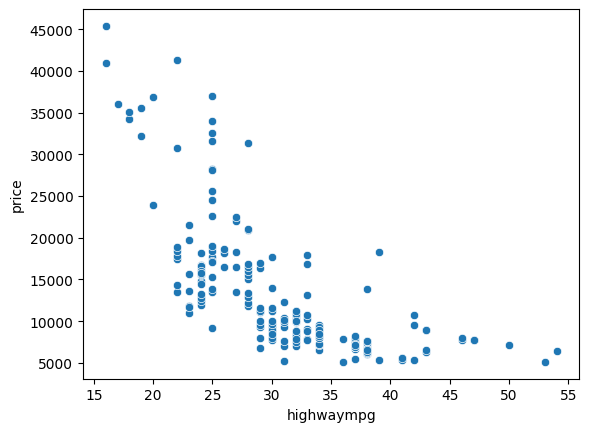

In [ ]:
sns.scatterplot(x='highwaympg',y='price',data=df)

<Axes: xlabel='highwaympg', ylabel='price'>

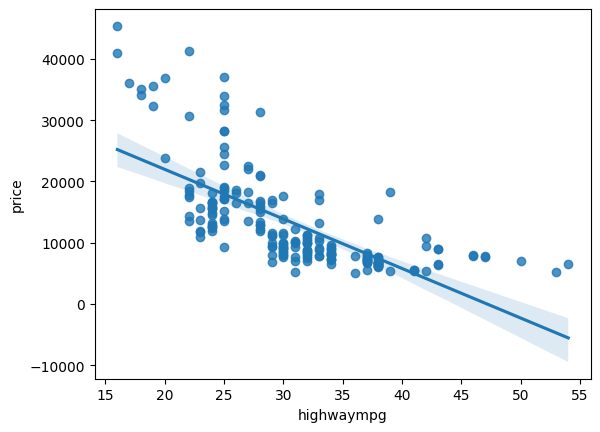

In [ ]:
sns.regplot(x='highwaympg',y='price',data=df)

In [ ]:
df_new= df[['highwaympg','citympg','price']]

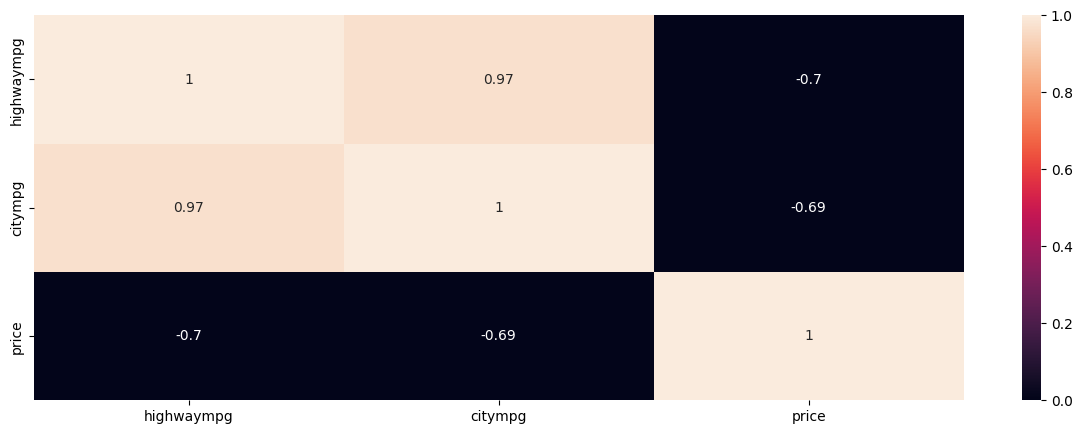

In [ ]:
corr = df_new.corr()

plt.figure(figsize=(15, 5))
sns.heatmap(corr, annot= True, vmin=0, vmax=1)
plt.show()

In [ ]:
# corr = df.corr()

# plt.figure(figsize=(10, 5))
# sns.heatmap(corr, annot= True, vmin=0, vmax=1)
# plt.show()

In [ ]:
# pendifinisian x dan y
X = df[['highwaympg','stroke']]
y = df['price']

In [ ]:
X

,highwaympg,stroke
0,27,2.68
1,27,2.68
2,26,3.47
3,30,3.40
4,22,3.40
...,...,...
200,28,3.15
201,25,3.15
202,23,2.87
203,27,3.40


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
sc=MinMaxScaler()
sc.fit(X)
x_scaled=sc.transform(X)

In [ ]:
X.shape

(205, 2)

In [ ]:
X_train_surge=np.array(X)

In [ ]:
x_scaled.shape

(205, 2)

In [ ]:
X

,highwaympg,stroke
0,27,2.68
1,27,2.68
2,26,3.47
3,30,3.40
4,22,3.40
...,...,...
200,28,3.15
201,25,3.15
202,23,2.87
203,27,3.40


In [ ]:
X_final = np.concatenate([x_scaled,X], axis=1)

In [ ]:
X_final.shape

(205, 4)

## Model Definition

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True )

## Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=101)

### Model Definition

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

## Train Model

In [ ]:
mod=model.fit(X_train,y_train)

In [ ]:
y_pred_train = mod.predict(X_train)
y_pred_test = mod.predict(X_test)

## Evaluation Model

In [ ]:
np.mean(y_train)

13895.662603658537

In [ ]:
np.mean(y_test)

10800.90243902439

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

print('MAE train = ', mean_absolute_error(y_train, y_pred_train))
print('MAE test = ', mean_absolute_error(y_test, y_pred_test))

print('MSE train = ', mean_squared_error(y_train, y_pred_train))
print('MSE test = ', mean_squared_error(y_test, y_pred_test))

print('RMSE train = ', np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('RMSE test = ', np.sqrt(mean_squared_error(y_test, y_pred_test)))

print('r2score train = ', r2_score(y_train, y_pred_train))
print('r2score test = ', r2_score(y_test, y_pred_test))

MAE train =  4455.687898308194
MAE test =  3663.3355288068947
MSE train =  35112731.88228711
MSE test =  23038075.1713798
RMSE train =  5925.599706551828
RMSE test =  4799.799492830904
r2score train =  0.49183009971645253
r2score test =  0.31238617529871116


## Coefficients

In [ ]:
mod.coef_

array([-31489.65832607,    416.03350319])

In [ ]:
mod.intercept_

25612.592361914678

# Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly = PolynomialFeatures(degree=7, include_bias=False)

In [ ]:
poly_features = poly.fit_transform(X_train)

In [ ]:
poly_feature_test = poly.transform(X_test)

In [ ]:
poly_features.shape

(164, 35)

In [ ]:
X_train.shape

(164, 2)

## Model Definition & Train Model

In [ ]:
poly_model = LinearRegression()
poly_model.fit(poly_features,y_train)

LinearRegression()

In [ ]:
poly_predict_train = poly_model.predict(poly_features)
poly_predict_test = poly_model.predict(poly_feature_test)

In [ ]:
mod.intercept_

25612.592361914678

In [ ]:
poly_model.coef_

array([-1.24168540e+07, -3.73406601e+07,  4.18223702e+07,  1.74252164e+08,
        2.35544682e+08, -1.46131501e+08, -1.86915298e+08, -1.03597882e+09,
       -6.78201253e+08,  3.59525101e+08,  5.19353345e+06,  1.03649225e+09,
        2.81091374e+09,  9.86845124e+08, -4.03377702e+08, -2.96852925e+08,
        3.72284553e+08, -2.78027675e+09, -3.73079297e+09, -7.06130721e+08,
        1.28000529e+08,  7.53359430e+08, -9.56847277e+08,  5.27551409e+08,
        2.84440836e+09,  2.36979704e+09,  1.96888223e+08, -1.61964881e+07,
       -1.16757754e+08, -3.59785084e+08,  1.01548631e+09, -9.69784051e+08,
       -8.60091724e+08, -5.90257629e+08,  1.13755615e+06])

## Evaluation Model

metrics with polynomial

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

print('MAE train = ', mean_absolute_error(y_train, poly_predict_train))
print('MAE test = ', mean_absolute_error(y_test, poly_predict_test))

print('MSE train = ', mean_squared_error(y_train, poly_predict_train))
print('MSE test = ', mean_squared_error(y_test, poly_predict_test))

print('RMSE train = ', np.sqrt(mean_squared_error(y_train, poly_predict_train)))
print('RMSE test = ', np.sqrt(mean_squared_error(y_test, poly_predict_test)))

print('r2score train = ', r2_score(y_train, poly_predict_train))
print('r2score test = ', r2_score(y_test, poly_predict_test))

MAE train =  2323.0977783830226
MAE test =  4964.513480054407
MSE train =  11908151.17645814
MSE test =  144894022.8170103
RMSE train =  3450.818913889592
RMSE test =  12037.193311441431
r2score train =  0.8276589809021724
r2score test =  -3.3246292263744337


matrics with linear regression

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

print('MAE train = ', mean_absolute_error(y_train, y_pred_train))
print('MAE test = ', mean_absolute_error(y_test, y_pred_test))

print('MSE train = ', mean_squared_error(y_train, y_pred_train))
print('MSE test = ', mean_squared_error(y_test, y_pred_test))

print('RMSE train = ', np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('RMSE test = ', np.sqrt(mean_squared_error(y_test, y_pred_test)))

print('r2score train = ', r2_score(y_train, y_pred_train))
print('r2score test = ', r2_score(y_test, y_pred_test))

MAE train =  4455.687898308194
MAE test =  3663.3355288068947
MSE train =  35112731.88228711
MSE test =  23038075.1713798
RMSE train =  5925.599706551828
RMSE test =  4799.799492830904
r2score train =  0.49183009971645253
r2score test =  0.31238617529871116


# Ridge Regression (L2)

In [ ]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=0.1)

In [ ]:
ridge_model.fit(X_train,y_train)

Ridge(alpha=0.1)

In [ ]:
ridge_pred_train = ridge_model.predict(X_train)
ridge_pred_test = ridge_model.predict(X_test)

## Model Evaluation

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

print('MAE train = ', mean_absolute_error(y_train, ridge_pred_train))
print('MAE test = ', mean_absolute_error(y_test, ridge_pred_test))

print('MSE train = ', mean_squared_error(y_train, ridge_pred_train))
print('MSE test = ', mean_squared_error(y_test, ridge_pred_test))

print('RMSE train = ', np.sqrt(mean_squared_error(y_train, ridge_pred_train)))
print('RMSE test = ', np.sqrt(mean_squared_error(y_test, ridge_pred_test)))

print('r2score train = ', r2_score(y_train, ridge_pred_train))
print('r2score test = ', r2_score(y_test, ridge_pred_test))

MAE train =  4451.476318123392
MAE test =  3679.765232220634
MSE train =  35123152.17133057
MSE test =  22912936.970971327
RMSE train =  5926.478901618614
RMSE test =  4786.745968919943
r2score train =  0.4916792918197075
r2score test =  0.31612115558499854


#Ridge with Polynomial

In [ ]:
ridge_model.fit(poly_features,y_train)
ridge_P_pred_train = ridge_model.predict(poly_features)
ridge_P_pred_test = ridge_model.predict(poly_feature_test)

In [ ]:
print('MAE train = ', mean_absolute_error(y_train, ridge_P_pred_train))
print('MAE test = ', mean_absolute_error(y_test, ridge_P_pred_test))

print('MSE train = ', mean_squared_error(y_train, ridge_P_pred_train))
print('MSE test = ', mean_squared_error(y_test, ridge_P_pred_test))

print('RMSE train = ', np.sqrt(mean_squared_error(y_train, ridge_P_pred_train)))
print('RMSE test = ', np.sqrt(mean_squared_error(y_test, ridge_P_pred_test)))

print('r2score train = ', r2_score(y_train, ridge_P_pred_train))
print('r2score test = ', r2_score(y_test, ridge_P_pred_test))

MAE train =  3451.1711694180776
MAE test =  2726.400404554859
MSE train =  24745539.372258916
MSE test =  18219732.57661472
RMSE train =  4974.488855375888
RMSE test =  4268.457868670454
r2score train =  0.6418695555384303
r2score test =  0.4561984927627799


# Lasso Regerssion (L1)

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
lasso_model = Lasso(alpha=0.1)

In [ ]:
lasso_model.fit(X_train,y_train)

Lasso(alpha=0.1)

In [ ]:
lasso_pred_train = lasso_model.predict(X_train)
lasso_pred_test = lasso_model.predict(X_test)

## Model Evaluation

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

print('MAE train = ', mean_absolute_error(y_train, lasso_pred_train))
print('MAE test = ', mean_absolute_error(y_test, lasso_pred_test))

print('MSE train = ', mean_squared_error(y_train, lasso_pred_train))
print('MSE test = ', mean_squared_error(y_test, lasso_pred_test))

print('RMSE train = ', np.sqrt(mean_squared_error(y_train, lasso_pred_train)))
print('RMSE test = ', np.sqrt(mean_squared_error(y_test, lasso_pred_test)))

print('r2score train = ', r2_score(y_train, lasso_pred_train))
print('r2score test = ', r2_score(y_test, lasso_pred_test))

MAE train =  4455.6824115750405
MAE test =  3663.4248772942
MSE train =  35112732.56127497
MSE test =  23039385.880440265
RMSE train =  5925.599763844582
RMSE test =  4799.936028786245
r2score train =  0.4918300898897835
r2score test =  0.31234705477047997


# Elastic Net (L3)

In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
elastic_model = ElasticNet()

In [ ]:
elastic_model.fit(X_train,y_train)

ElasticNet()

In [ ]:
elastic_pred_train = elastic_model.predict(X_train)
elastic_pred_test = elastic_model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

print('MAE train = ', mean_absolute_error(y_train, elastic_pred_train))
print('MAE test = ', mean_absolute_error(y_test, elastic_pred_test))

print('MSE train = ', mean_squared_error(y_train, elastic_pred_train))
print('MSE test = ', mean_squared_error(y_test, elastic_pred_test))

print('RMSE train = ', np.sqrt(mean_squared_error(y_train, elastic_pred_train)))
print('RMSE test = ', np.sqrt(mean_squared_error(y_test, elastic_pred_test)))

print('r2score train = ', r2_score(y_train, elastic_pred_train))
print('r2score test = ', r2_score(y_test, elastic_pred_test))

MAE train =  5961.4227875107945
MAE test =  5507.80453649284
MSE train =  64870954.62274102
MSE test =  40164489.68480063
RMSE train =  8054.250717648478
RMSE test =  6337.546030191862
r2score train =  0.06115346842133562
r2score test =  -0.19878323878596582


# Logistic Regression

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/DianCA26/Dataset/main/mushrooms.csv')

In [ ]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [ ]:
X = df.drop('class',axis=1)
y = df['class']

## Train Test Split & Encoding

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
enc = OneHotEncoder()
enc.fit(X_train)

OneHotEncoder()

In [ ]:
X_enc=enc.transform(X_train).toarray()
X_enc_test=enc.transform(X_test).toarray()

## Model Definition

In [ ]:
X_enc

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.]])

In [ ]:
y_train

2430    e
3124    p
3605    p
2667    e
1039    p
       ..
5695    e
8006    p
1361    p
1547    e
4959    p
Name: class, Length: 6499, dtype: object

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_model = LogisticRegression()

In [ ]:
log_model.fit(X_enc,y_train)

LogisticRegression()

## Model Evaluation

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix

In [ ]:
y_pred_train = log_model.predict(X_enc)
y_pred_test = log_model.predict(X_enc_test)

In [ ]:
print('accuracy score train : ',accuracy_score(y_train,y_pred_train))
print('accuracy score test : ',accuracy_score(y_test,y_pred_test))

accuracy score train :  1.0
accuracy score test :  1.0


In [ ]:
log_model.classes_

array(['e', 'p'], dtype=object)

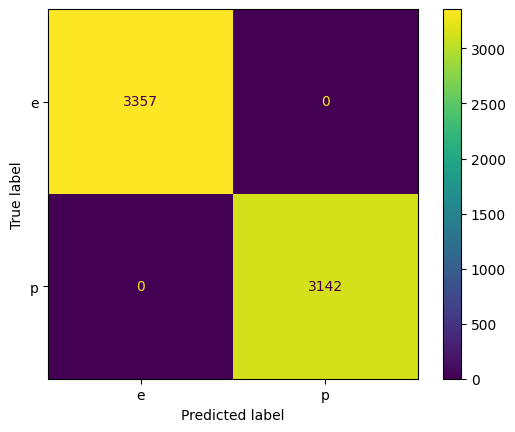

In [ ]:
cm = confusion_matrix(y_train, y_pred_train, labels=log_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=log_model.classes_)

disp.plot()
plt.show()

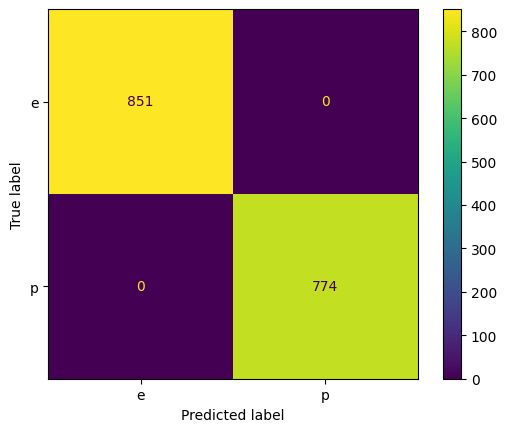

In [ ]:
cm = confusion_matrix(y_test, y_pred_test, labels=log_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=log_model.classes_)

disp.plot()
plt.show()

In [ ]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       851
           p       1.00      1.00      1.00       774

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [ ]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00      3357
           p       1.00      1.00      1.00      3142

    accuracy                           1.00      6499
   macro avg       1.00      1.00      1.00      6499
weighted avg       1.00      1.00      1.00      6499



In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/DianCA26/Dataset/main/CarPrice_Assignment.csv")

In [ ]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [ ]:
X = df[['highwaympg','boreratio','price']]
y = df['fueltype']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=26)

from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
sc.fit(X_train)
x_scaled=sc.transform(X_train)
x_scaled_test=sc.transform(X_test)

In [ ]:
log_model.fit(x_scaled,y_train)

LogisticRegression()

In [ ]:
y_pred_train = log_model.predict(x_scaled)
y_pred_test = log_model.predict(x_scaled_test)

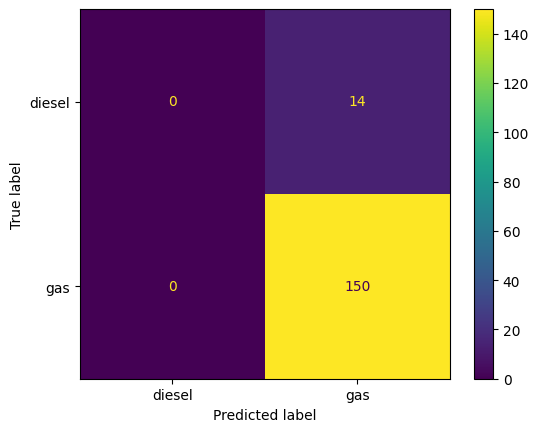

In [ ]:
cm = confusion_matrix(y_train, y_pred_train, labels=log_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=log_model.classes_)

disp.plot()
plt.show()

In [ ]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

      diesel       0.00      0.00      0.00        14
         gas       0.91      1.00      0.96       150

    accuracy                           0.91       164
   macro avg       0.46      0.50      0.48       164
weighted avg       0.84      0.91      0.87       164



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Multiclass LogReg

In [ ]:
df = pd.read_csv('https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv')

In [ ]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


<Axes: xlabel='petal.length', ylabel='petal.width'>

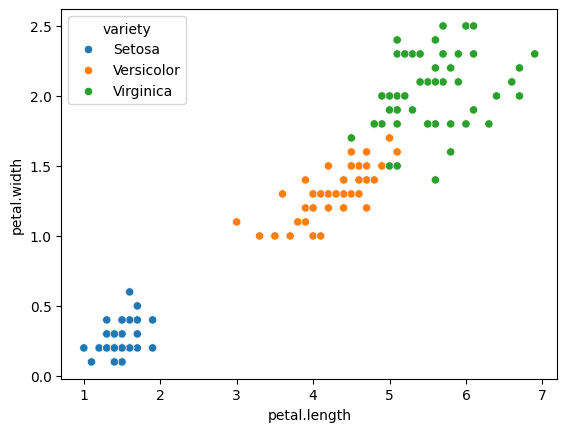

In [ ]:
sns.scatterplot(x='petal.length',y='petal.width',data=df,hue='variety')

In [ ]:
# sns.heatmap(df.corr(),annot=True)

In [ ]:
X = df.drop('variety',axis=1)
y = df['variety']

## Model Definition

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg_model = LogisticRegression()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [ ]:
logreg_model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
logreg_pred_train = logreg_model.predict(X_train)
logreg_pred_test = logreg_model.predict(X_test)

In [ ]:
prob=logreg_model.predict_proba(X_test)

In [ ]:
prob

array([[9.87282523e-01, 1.27174305e-02, 4.60269337e-08],
       [9.86049997e-01, 1.39499254e-02, 7.74164508e-08],
       [9.69060858e-01, 3.09382804e-02, 8.61698512e-07],
       [5.51319346e-05, 1.97908240e-01, 8.02036628e-01],
       [3.90115739e-03, 8.52849638e-01, 1.43249204e-01],
       [1.17945605e-03, 4.19307392e-01, 5.79513152e-01],
       [3.14026961e-03, 7.81532443e-01, 2.15327287e-01],
       [2.27584020e-02, 9.14370172e-01, 6.28714262e-02],
       [5.09791319e-04, 2.90938063e-01, 7.08552146e-01],
       [9.67202434e-01, 3.27973386e-02, 2.27479832e-07],
       [3.45905170e-04, 1.95973400e-01, 8.03680695e-01],
       [9.86416733e-01, 1.35832082e-02, 5.86471671e-08],
       [9.61211345e-01, 3.87882561e-02, 3.99197171e-07],
       [2.25386618e-07, 1.14857592e-02, 9.88514015e-01],
       [1.98400343e-03, 4.08810131e-01, 5.89205866e-01],
       [1.16311124e-02, 9.20919393e-01, 6.74494942e-02],
       [3.94171745e-02, 8.98025695e-01, 6.25571301e-02],
       [2.57449996e-02, 8.96949

In [ ]:
logreg_pred_test

array(['Setosa', 'Setosa', 'Setosa', 'Virginica', 'Versicolor',
       'Virginica', 'Versicolor', 'Versicolor', 'Virginica', 'Setosa',
       'Virginica', 'Setosa', 'Setosa', 'Virginica', 'Virginica',
       'Versicolor', 'Versicolor', 'Versicolor', 'Setosa', 'Virginica',
       'Versicolor', 'Setosa', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Virginica', 'Setosa', 'Setosa',
       'Virginica', 'Versicolor', 'Virginica', 'Versicolor', 'Virginica',
       'Versicolor', 'Versicolor', 'Versicolor'], dtype=object)

## Evaluation Model

In [ ]:
print('accuracy score train : ',accuracy_score(y_train,logreg_pred_train))
print('accuracy score test : ',accuracy_score(y_test,logreg_pred_test))

accuracy score train :  0.9642857142857143
accuracy score test :  1.0


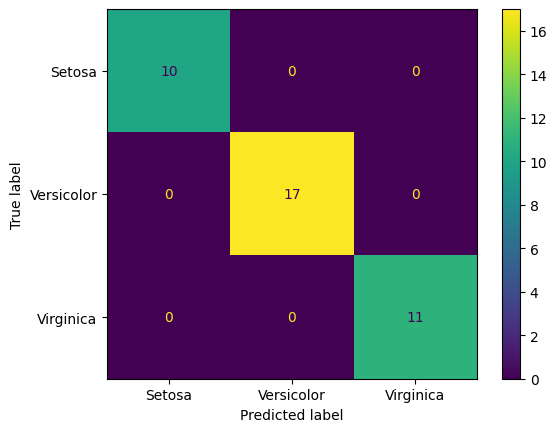

In [ ]:
cm = confusion_matrix(y_test, logreg_pred_test, labels=logreg_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=logreg_model.classes_)

disp.plot()
plt.show()

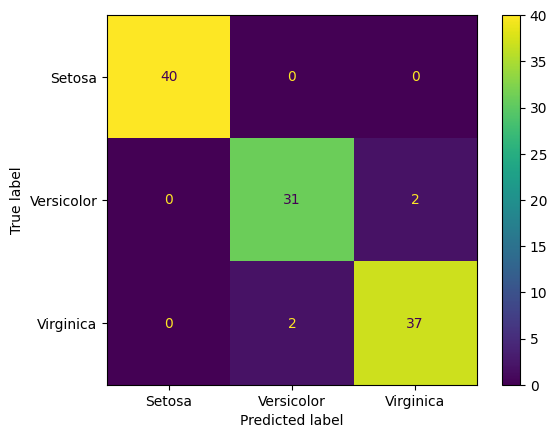

In [ ]:
cm = confusion_matrix(y_train, logreg_pred_train, labels=logreg_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=logreg_model.classes_)

disp.plot()
plt.show()

In [ ]:
print(classification_report(y_train,logreg_pred_train))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        40
  Versicolor       0.94      0.94      0.94        33
   Virginica       0.95      0.95      0.95        39

    accuracy                           0.96       112
   macro avg       0.96      0.96      0.96       112
weighted avg       0.96      0.96      0.96       112



Precision untuk Virginica:
95% berhasil memprediksi orang yg ada di kelas virginica dgn benar, 5 % salah prediksi (kita prediksi sebagai virginica, padahal bukan)

Recall untuk Virginica:
95% berhasil memprediksi orang yg ada di kelas virginica dgn benar, 5 % salah prediksi (kita prediksi bukan sebagai virginica, padahal harusnya dia masuk kelas virginica)

In [ ]:
print(classification_report(y_test,logreg_pred_test))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       1.00      1.00      1.00        17
   Virginica       1.00      1.00      1.00        11

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

